20110280_Bùi Thị Thanh Phương _ca1

1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Determine the cluster number
    3. a. Use elbow method as baseline
    3. b. Apply other methods to compare with elbow
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable clustering model for this problem. 
5. Visualize your cluster in 2D or 3D to compare the result.
6. Measure performance of your clustering model.
7. Conclusion and Discussion (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

Wholesale customers là dataset phục vụ cho bài toán customer segmentation dựa vào một số thông tin và hành vi của khách hàng 
- Đọc dữ liệu
- Trực quan hóa dữ liệu
- Chuẩn hóa dữ liệu 
- Dùng elbow method để chọn ra số clusters thích hợp (có thể chọn số clusters $\pm1$ để so sánh sự khác biệt)
- Biểu diễn các cụm sang không gian 2 chiều và 3 chiều
- Chọn ra một số data samples theo từng cụm để phân tích các giá trị trong đó 

# Load Dataset

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns

In [44]:
df = pd.read_csv("/content/Clustered_Customer_Data.csv")

In [45]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


# Data Analysis

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [47]:
df.describe()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,4474.500000,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,1.442011
std,2583.786788,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,1.373951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.000000
25%,2237.250000,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.000000
50%,4474.500000,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,2.000000
75%,6711.750000,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,3.000000
max,8949.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,3.000000


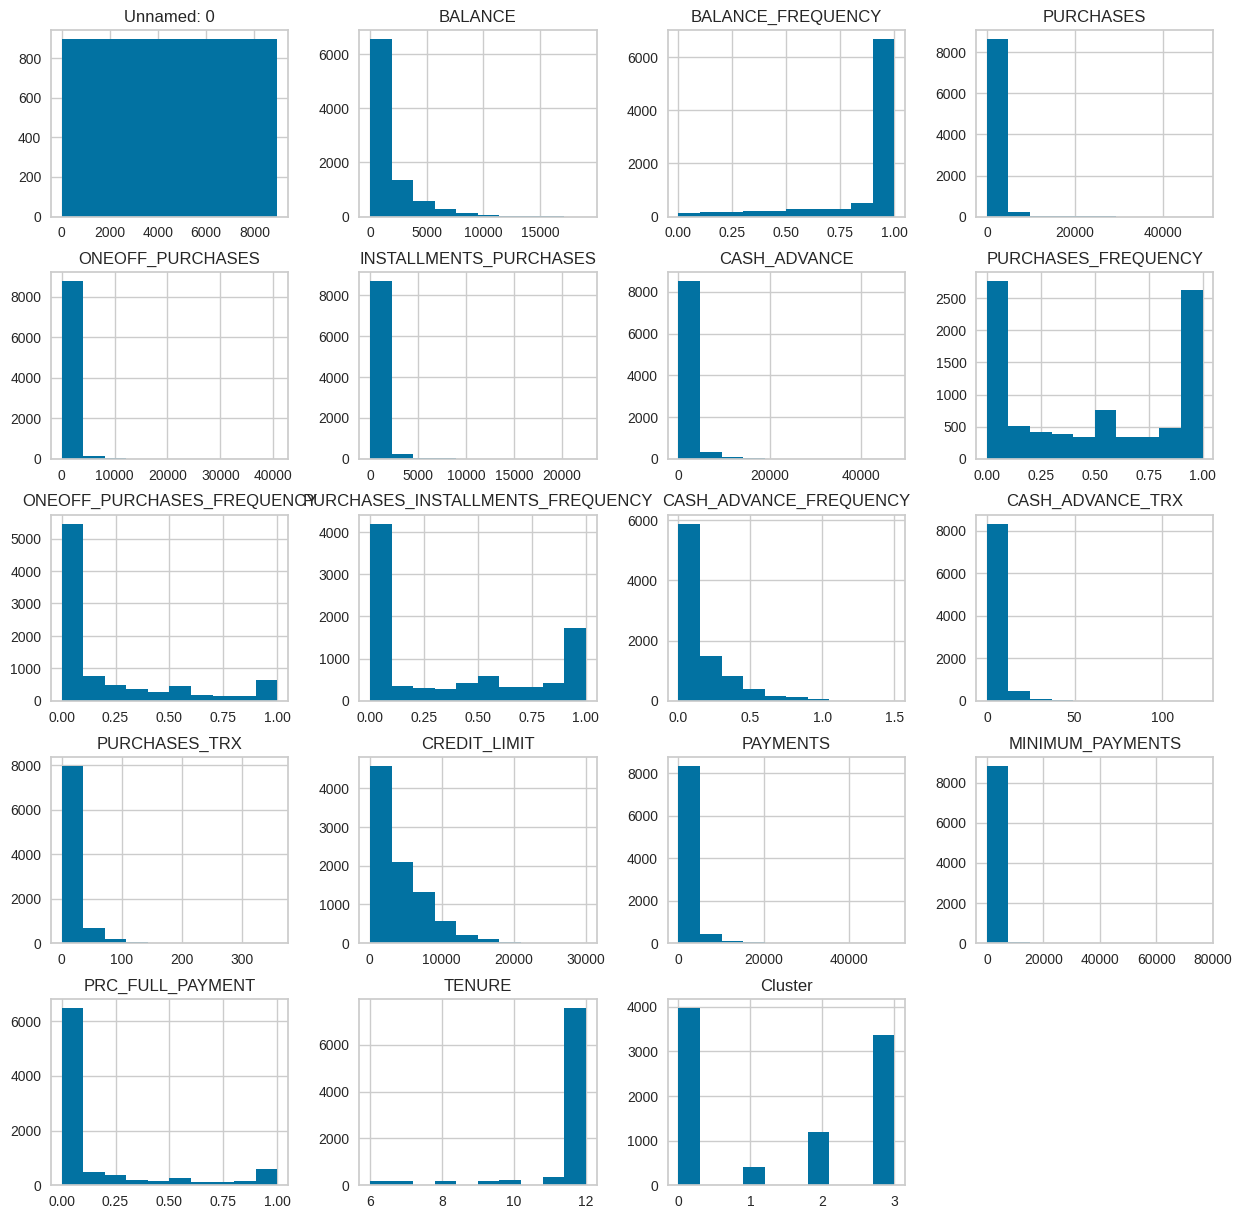

In [48]:
df.hist(figsize=(15, 15))
plt.show()

<Axes: >

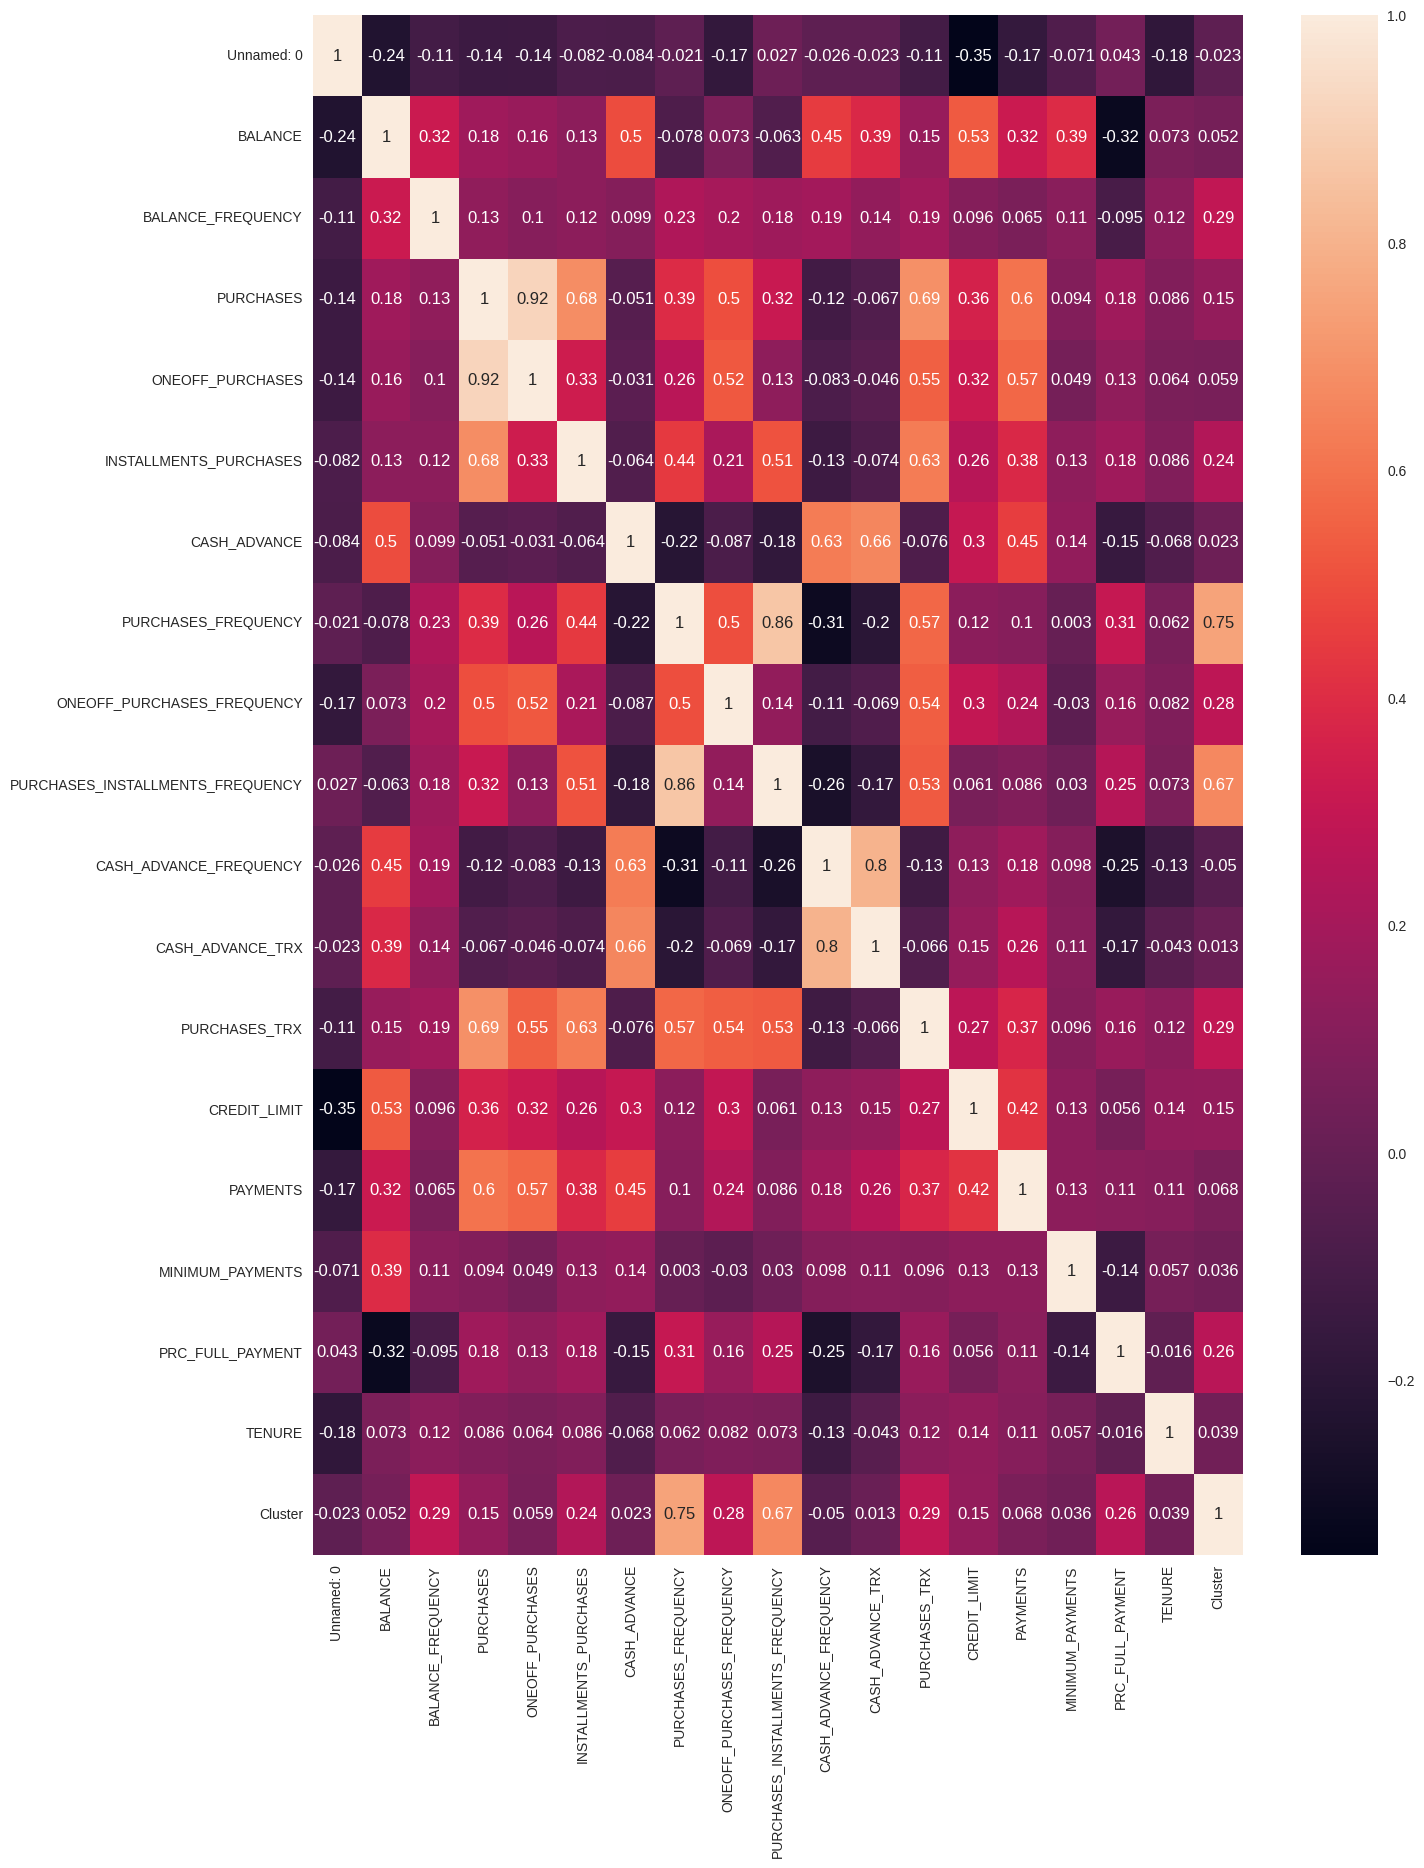

In [49]:
plt.figure(figsize=(15,20))
sns.heatmap(df.corr(), annot=True)

# Data Preprocessing

In [50]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    df = df.drop_duplicates()
    null_values = df.isna().sum().sum()
    if null_values != 0:
        imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
        cols = df.columns
        df = imp_mean.fit_transform(df)
        df = pd.DataFrame(df, columns=cols)  
    return df

In [51]:
df = preprocessing_data(df)
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [ ]:
df = preprocessing_data(df.copy())

# Feature Engineering

In [ ]:
data = df.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in cat_cols:
    data.loc[:, col] = encoder.fit_transform(data[col])

In [ ]:
data

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,age
0,0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0,40.900749
1,1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2,3202.467416
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3,2495.148862
3,3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0,1666.670542
4,4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0,817.714335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,3,28.493517
8946,8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,3,19.183215
8947,8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,3,23.398673
8948,8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0,13.457564


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

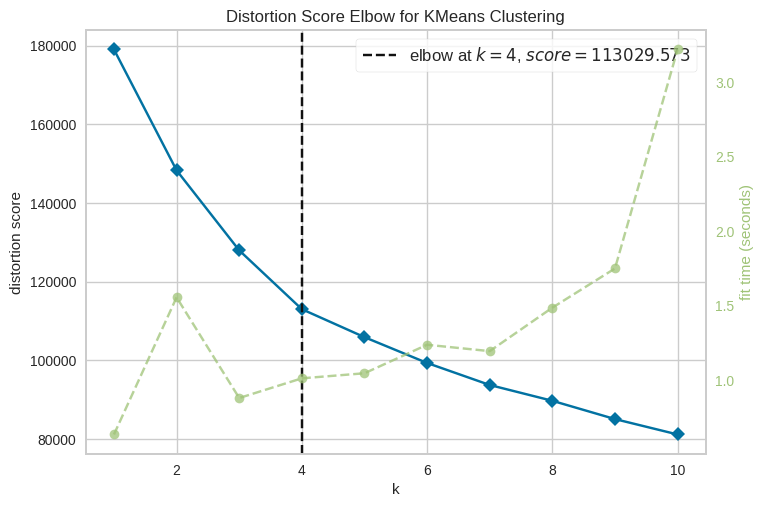

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
elbow_method = KElbowVisualizer(KMeans(), k=(1,11))
elbow_method.fit(scaled_data)
elbow_method.show()

# Model Part

In [ ]:
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
#để xuất ra label của tập training (scaled_data) ta dùng .labels_
kmeans_model.labels_

array([1, 2, 0, ..., 0, 1, 1], dtype=int32)

In [ ]:
#để dự đoán ra label của tập testing (ta giả sử là scaled_data) ta dùng .predict
kmeans_model.predict(scaled_data)

array([1, 2, 0, ..., 0, 1, 1], dtype=int32)

In [ ]:
#Để xuất ra các centroids ta có thể dùng .cluster_centers_
kmeans_model.cluster_centers_

array([[ 0.01538669, -0.30093847,  0.25869132,  0.34654428,  0.21199789,
         0.42977773, -0.36634071,  0.99961148,  0.44919895,  0.89231816,
        -0.46597569, -0.35849468,  0.51939786,  0.00950122,  0.01169326,
        -0.109735  ,  0.43411886,  0.07846146,  1.00856474, -0.30093847],
       [ 0.10350363, -0.26662958, -0.35183497, -0.34665313, -0.23390131,
        -0.38974642, -0.14265601, -0.80510704, -0.39278626, -0.71875894,
        -0.03108213, -0.1087655 , -0.47783985, -0.3384601 , -0.25427993,
        -0.12715146, -0.26069943, -0.07888481, -0.99742649, -0.26662958],
       [-0.39714768,  1.80870139,  0.41496529,  0.13325872,  0.15554948,
         0.0290979 ,  1.58505987, -0.27606403, -0.01898887, -0.24620189,
         1.5063789 ,  1.4465783 ,  0.05828895,  1.11884126,  0.82687287,
         0.76098446, -0.42143416,  0.03152289,  0.3489958 ,  1.80870139]])

#PCA


In [ ]:
from sklearn.decomposition import PCA #Khai báo thư viện PCA
pca = PCA(n_components=len(data.columns)) #khai báo 
pca.fit(scaled_data)

PCA(n_components=20)

In [ ]:
#cho ta biết được các thành phần phủ được bao nhiêu lượng thông tin của data gốc
pca.explained_variance_ratio_*100

array([2.49572813e+01, 2.05830354e+01, 9.53901676e+00, 7.43684805e+00,
       5.76303708e+00, 5.24979673e+00, 4.58234797e+00, 3.79661367e+00,
       3.46593393e+00, 3.31541185e+00, 2.79741390e+00, 2.11853238e+00,
       1.82461647e+00, 1.46309370e+00, 1.05438912e+00, 9.92112909e-01,
       8.44343552e-01, 2.16117021e-01, 5.82164084e-05, 3.16492447e-31])

In [ ]:
pca = PCA(n_components=3) #dùng pca 3 thành phần
pca_df = pd.DataFrame(pca.fit_transform(scaled_data), columns=["pca_1", "pca_2", "pca_3"])#tạo ra dataframe với 3 thành phàn là pca1, pca2, và pca3

In [ ]:
pca_df

,pca_1,pca_2,pca_3
0,-1.942638,-0.556058,1.132759
1,-0.245699,2.874989,0.097279
2,1.426292,-0.249981,-0.124159
3,-0.881912,0.621190,1.978984
4,-1.724274,-0.064299,1.064534
...,...,...,...
8945,-0.708246,-2.414725,-2.124869
8946,-0.834353,-1.993953,-2.161424
8947,-1.234894,-2.087644,-1.673295
8948,-2.938846,-0.503136,0.525062


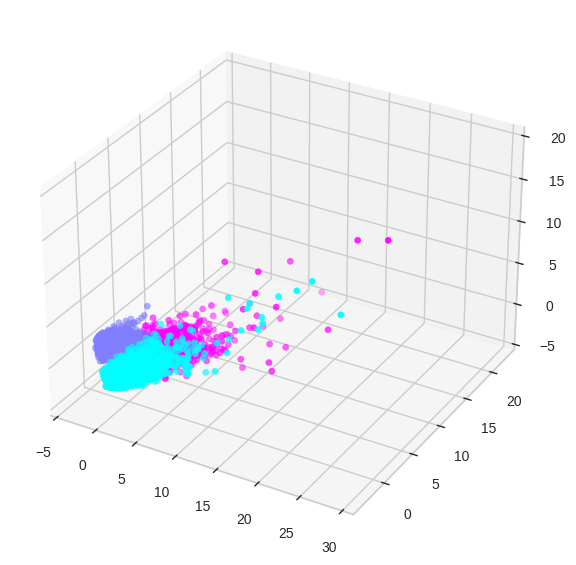

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot(projection="3d")
ax.scatter(pca_df.pca_1, pca_df.pca_2, pca_df.pca_3, c=kmeans_model.labels_, cmap="cool")
plt.show()

##2 dimensional PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(scaled_data)
pca_df = pd.DataFrame(pca.transform(scaled_data), columns=["pca1", "pca2"])

In [ ]:
pca_df.head()

,pca1,pca2
0,-1.942634,-0.556052
1,-0.245702,2.874981
2,1.426306,-0.249965
3,-0.881911,0.621185
4,-1.724270,-0.064291


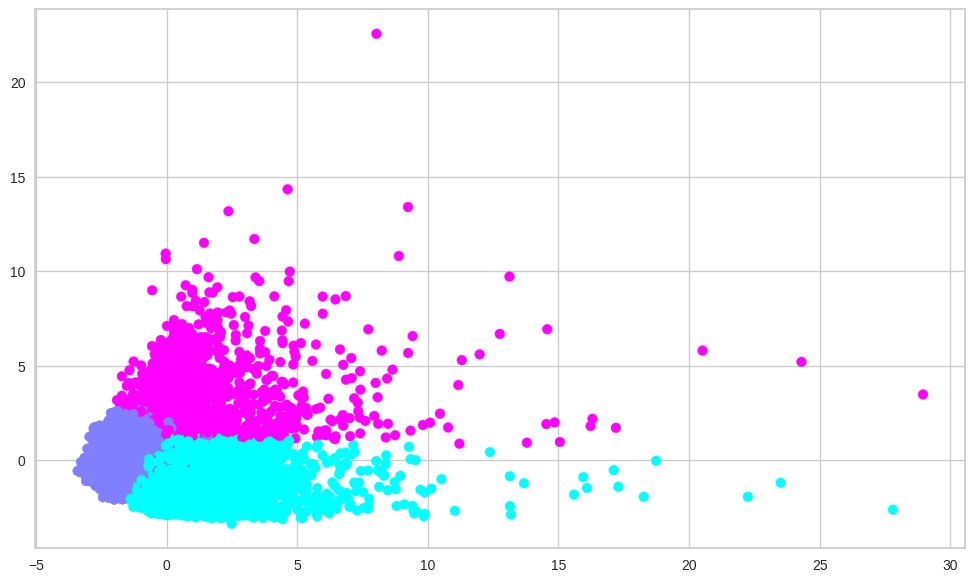

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
ax.scatter(pca_df.pca1, pca_df.pca2, c=kmeans_model.labels_, cmap="cool")
plt.show()

##Nếu muốn vẽ có thêm legend

<ipython-input-37-acdd45d4ed8d>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pca_df.iloc[index].pca1, pca_df.iloc[index].pca2, label=g, cmap="cool")


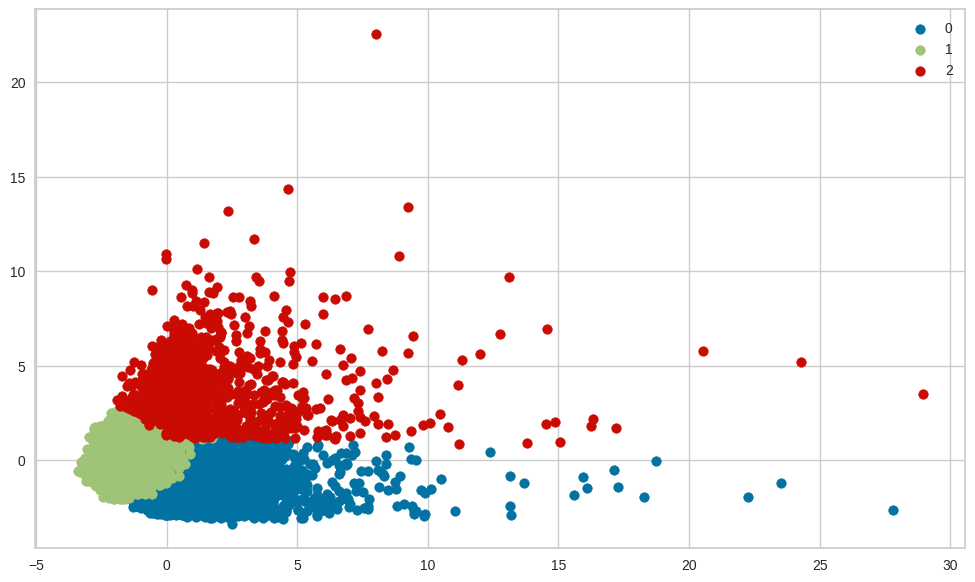

In [ ]:
plt.figure(figsize=(12, 7))
ax = plt.subplot()
group = kmeans_model.labels_
for g in np.unique(group):
    index = np.where(group==g)
    ax.scatter(pca_df.iloc[index].pca1, pca_df.iloc[index].pca2, label=g, cmap="cool")
ax.legend()
plt.show()

Save và load model

In [ ]:
#Save model
import pickle #import thư viện pickle
file_name = "model.sav" #Tạo tên cũng như đường dẫn lưu model (nếu chỉ để tên model không thì sẽ lưu tại thư mục hiện hành)
pickle.dump(kmeans_model, open(file_name, "wb")) #nhận vào tên thư viện và đường dẫn lưu trữ model

In [ ]:
#Load model
file_name = "model.sav"
model = pickle.load(open(file_name, "rb"))

#Lấy ra các dataframe theo cluster

In [ ]:
cluster = kmeans_model.labels_
cluster_0 = np.where(cluster==0) #index các data samples thuộc cluster 1
cluster_1 = np.where(cluster==1) #index các data samples thuộc cluster 2
cluster_2 = np.where(cluster==2) #index các data samples thuộc cluster 3
cluster_3 = np.where(cluster==3) #index các data samples thuộc cluster 4

In [ ]:
#Lấy ra các data samples thuộc cluster 1
data.iloc[cluster_0]

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,age
2,2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.0,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12,3,2495.148862
5,5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.0,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12,3,1809.828751
6,6,627.260806,1.000000,7091.01,6402.63,688.38,0.0,1.000000,1.0,1.000000,0.0,0,64,13500.0,6354.314328,198.065894,1.00,12,1,627.260806
7,7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.0,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12,3,1823.652743
10,10,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.0,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12,3,1293.124939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.0,0.833333,0.0,0,6,1000.0,475.523262,82.771320,1.00,6,3,130.838554
8942,8942,40.829749,1.000000,113.28,0.00,113.28,0.0,1.000000,0.0,0.833333,0.0,0,6,1000.0,94.488828,86.283101,0.25,6,3,40.829749
8945,8945,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.0,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.50,6,3,28.493517
8946,8946,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.0,0.833333,0.0,0,6,1000.0,275.861322,864.206542,0.00,6,3,19.183215
